In [8]:
# Course  Link: https://www.youtube.com/watch?v=fCMrO_VzeL8&index=16&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y

import pandas as pd

# 16: how to handle Missing Values
# - NaN is refering to a missing Value..simple

ufo = pd.read_csv('http://bit.ly/uforeports')

ufo.tail()

ufo.isnull().tail() # shows T and F statement for each data point

ufo.notnull().tail # the opposite results of .isnull()

ufo.isnull().sum() # number of missing values for each column

pd.Series([True, False, True]).sum()

ufo[ufo.City.isnull()] # View the 25 row where city is missing

ufo.shape # View shape of dataframe

ufo.dropna(how='any', inplace=True).shape # Drop all rows where their is 1 missing value in the row

ufo.dropna(how='all', inplace-True).shape # Drop, if all columns in row are NaN

ufo.dropna(subset=['City','Shape Reported '], how ='any').shape # Drop row if City or Shape Reported is NaN

ufo.dropna(subset=['City','Shape Reported '], how ='all').shape # Drop row if City and Shape Reported is NaN

ufo['Shape Reported'].value_counts() # Shows the Frequency of Values in column, Missing values are excluded from value_counts function

ufo['Shape Reported'].value_counts(dropna = False) # Shows the Frequency of Values in column including NaN

ufo['Shape Reported'].fillna(value='VARIOUS', inplace = True) #Fill all Nan values with Various Dimension



,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [10]:
# 19 When do I use the inlace parameter

ufo.shape

ufo.head()

ufo.drop(['City'],axis = 1, inplace = True).head() #Drop column inplace

ufo.dropna(how='any').shape #Viewing change, that 2490 rows would be dropped

ufo.dropna(how='any', inplace = True).shape #drop 2490 rows with NaN values

ufo.set_index('Time', inplace = True) #Set Time column as index via inplace

ufo = ufo.set_index('Time') #Set Time columns as index via assignment (2nd copy created)

#ufo.fillna(method='bfill').tail()

#ufo.fillna(method='ffill').tail()


ValueError: labels ['City'] not contained in axis

In [14]:
# 22 How to I use pandas with scikit-learn to create Kaggle Submissions?

train = pd.read_csv('http://bit.ly/kaggletrain')

train.head()

feature_cols = ['Pclass','Parch']

X = train.loc[:, feature_cols]

X.shape

y = train.Survived

y.shape

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

test = pd.read_csv('http://bit.ly/kaggletest')
test.head()

X_new = test.loc[:,feature_cols]
X_new.shape

new_pred_class = logreg.predict(X_new) # Guess: Predicts Value

new_pred_class

pd.DataFrame({'PassengerId':test.PassengerId},'Survived':new_pred_class).set_index('PassengerId').to_csv('sub.csv') 
# Create a CSV File fro Sumbission after setting index and creating data frame 

train.to_pickle('train.pk1') 

pd.read_pickle('train.pk1')


ModuleNotFoundError: No module named 'sklearn'

In [16]:
# 23 More of your pandas questions answered! 

# Pandas API Reference lists every function within the framework
# Some functinos are muplitple methods (Series, Dataframe, pd, i.e isnull())
# loc uses inclusive indexing 
# iloc uses inclusive indexing on the left, and exclusive on the right
# Pandas uses Numpy slicing features
ufo.loc[:,'City':'State']

# Take a random sample

ufo.sample(n=3) # Take a random sample from each time the notebook runs the cell

ufo.sample(n=3, random_state=42) # Take a random sample, but hold the results the same when running the cell

ufo.sample(frac=.75, random_state=42) # Getting a random sample, hold the results, of 75% of the observation within the data frame

# you cannot use n and frac in the sample function at the same time


# how to split you data into training and testing -> 75/25 split

train = ufo.sample(frac=0.75, random_state = 99)
test = ufo.loc[~ufo.index.isin(train.index),:]


In [17]:
# 24 How do I create dummy variable in pandas

train = pd.read_csv('http://bit.ly/kaggletrain')

train.head()

train['Sex_male'] = train.Sex.map({'female':0, 'male':1}) # New Column, repalce strings with int representations

train.head()

pd.get_dummies(train.Sex)

# number of categorcial variable is k = 10, your want to use k - 1 = 9 dummy variables

pd.get_dummies(train.Sex).iloc[:,1:]

pd.get_dummies(train.Sex, prefix='Sex').iloc[:,1:] #Dropping and Replacing row in DataFrame with dummies

train.Embarked.value_counts()

pd.get_dummies(train.Embarked, prefix = 'Embarked')

pd.get_dummies(train.Embarked, prefix = 'Embarked').iloc[:,1:] #Dropping and Replacing row in DataFrame with dummies

embarked_dummies = pd.get_dummies(train.Embarked, prefix = 'Embarked').iloc[:,1:] 

train = pd.concat ([train, embarked_dummies],axis = 1) # Concat dataframes

train.head()


#Bonus -Passinp dataframe to get_dummies function 

train = pd.read_csv('http://bit.ly/kaggletrain')

pd.get_dummies(train, columns=['Sex','Embarked']) # Will change colums to dummies in dataframe

pd.get_dummies(train, columns=['Sex','Embarked'], drop_first=True) # Will change colums to dummies in dataframe,and drop orginal columns



,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,0,0,0


<IPython.core.display.Javascript object>


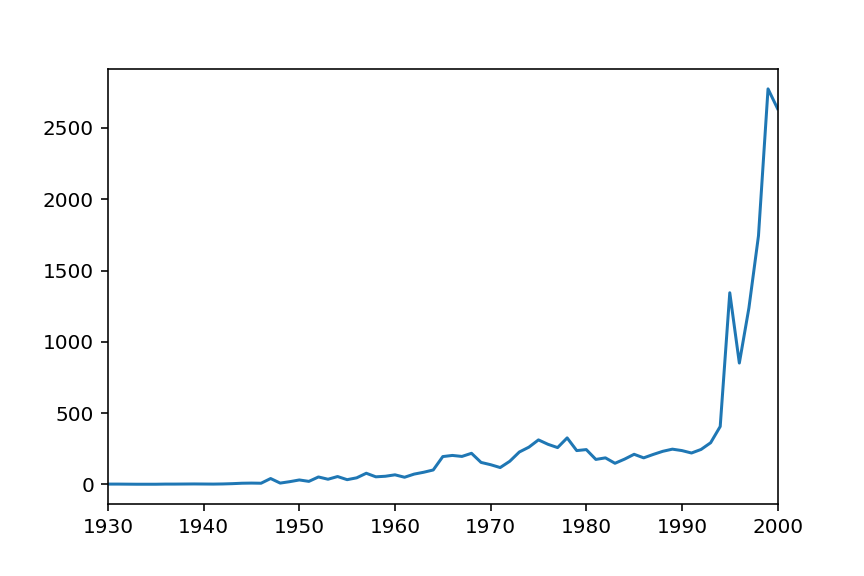

In [43]:
# 25 How do I work with dates and times in pandas.

import datetime as dt
import matplotlib as plt

ufo = pd.read_csv('http://bit.ly/uforeports')

ufo.head()

ufo.dtypes

#ufo.Time.str.slice(-5,-5).astype(int).head() #Extract Time from String - Messy

ufo['Time'] = pd.to_datetime(ufo.Time) #Convert Column to DateTime

# pd.to_dateTime automatically figures out the formate of you datetime

ufo.dtypes

ufo.Time.dt.weekday # Weekday

ufo.Time.dt.dayofyear # Day of Year

ufo.Time.dt.hour # Hour

ufo.Time.dt.weekday_name.head() # Weekday Name

#More opition in API documentation 

ts = pd.to_datetime('1/1/1999') # Timestamp

ufo.loc[ufo.Time <= ts,:].head() # Running comparison with Timestamp value

ufo.Time.max() - ufo.Time.min() # You can substract times, this is a time delta object 


# Bonus - Plotting number of UFO reports per year

%matplotlib notebook

ufo['Year'] = ufo.Time.dt.year

ufo.head()

ufo.Year.value_counts() #Sorted by Value Counts

ufo.Year.value_counts().sort_index() # Sorted By Year

ufo.Year.value_counts().sort_index().plot()



In [65]:
# 26 - How to I find and remove duplicate rows in pandas

# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col = 'user_id')

users.head()

users.shape

users.zip_code.duplicated() # Duplicate F or T statement, if something above in column already exists

users.zip_code.duplicated().sum() # Summed number of duplicates

users.duplicated() #True if an entire row is the same as a entire row above

users.duplicated().sum() # Summed number of duplicates

users.loc[users.duplicated(),:] #Using loc to view rows where the duplicates exist

users.loc[users.duplicated(keep='first'),:] # Viewing the "First" duplicates in the dataframe

users.loc[users.duplicated(keep='last'),:] # Viewing the "last" duplicates in the dataframe

users.loc[users.duplicated(keep=False),:] # Viewing all duplicates as True, viewing all the pairs

users.drop_duplicates(keep='first').shape # Dropped first 7 rows

users.drop_duplicates(keep='last').shape # Dropped last 7 rows

users.drop_duplicates(keep=False).shape # Dropped all 14 rows

users.drop_duplicates(subset=['age','zip_code']).shape #Dropping on duplicates from comparing only age and zipcode


(927, 4)

In [78]:
# 27 How do I avoid a SettingWithCopyWarning in Pandas

movies = pd.read_csv('http://bit.ly/imdbratings')

movies.head()

movies.content_rating.isnull().sum() # View Null Value Totals

movies[movies.content_rating.isnull()] # Viewing Null Value rows using Where

movies.content_rating.value_counts() # Viewing Value Counts

movies[movies.content_rating == 'NOT RATED'] # Viewing all Rows with Content Rating eqauls "Not Rated"

import numpy as np

movies[movies.content_rating == 'NOT RATED'].content_rating = np.nan # Overwritting Value on Dataframe Warning

movies.content_rating.sum() # You can check that the above line of code did not work

movies.loc[movies.content_rating == 'NOT RATED','content_rating'] = np.nan

# Funcky - Come back to this Lesson 








/Users/Kavi/anaconda/envs/Platinum/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


TypeError: must be str, not int

In [112]:
# 28 - How do I change display option in pandas. 

drinks = pd.read_csv('http://bit.ly/drinksbycountry')

# You can find options at Pandas GET Option

pd.get_option('display.max_rows') # View the Current Option

pd.set_option('display.max_rows', None)# View the All Rows

pd.set_option('display.max_rows', 100)# View top 100 Rows

drinks

pd.reset_option('display.max_rows') # Reset Option to Default

drinks

pd.set_option('display.max_columns', None)

drinks

# 2nd Example

train = pd.read_csv('http://bit.ly/kaggletrain')

train.head() #Strings in Name Column are Viewed as .....

pd.set_option('display.max_colwidth', 1000) # View column width up to 1000 characters

train.head() 

pd.get_option('display.precision') # Digit are viewied 6 digits after decimal point

pd.set_option('display.precision', 2) # Now only 2 decimal points for Fare, underlining data is not affected

train.head() 

# How to format large number to include commas

drinks['x'] = drinks.wine_servings * 1000
drinks['y'] = drinks.total_litres_of_pure_alcohol * 1000

# Added some large numbers

drinks.head()

pd.set_option('display.float_format','{:,}'.format) # Added comas to floating point numbers

# This does not affect Intergers

drinks.head()

# Bonus - Viewing Pandas Options Offline

pd.describe_option() # Describes Every Option

pd.describe_option('row') #Searching Options by Strin "row" on Option Title

pd.reset_options('all') # Reset All Options

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]

display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]

display.column_space No description available.
    [default: 12] [currently: 12]

display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]

display.date_yearfirst : boolean
    When True, prints and parses dates with the year first, eg 2005/01/20
    [default: False] [currently: False]

display.encoding : str/unicode
    Defaults to the detected encoding of the console.
    Specifies the encoding to be used for strings returned by to_string,
    these are generally strings meant to be displayed on the console.
    [default: UTF-8] 

AttributeError: module 'pandas' has no attribute 'reset_options'

In [138]:
# 29 - How do I creat a pandas Dataframe from another object

# Create Dataframe from Dictionary

pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']}) # Unorder Dataframe

pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']}, columns=['id','color']) # Specified column order

df = pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']}, columns=['id','color'], index=['a','b','c']) #Added index to dataframe

# Create Dataframe from Lists

pd.DataFrame([[100,'red'],[101,'blue'],[102,'red']]) # List are stacked on top of each other

pd.DataFrame([[100,'red'],[101,'blue'],[102,'red']], columns=['id','color']) # Specified Columns


# Create Dataframe from Numpy Arrary

arr = np.random.rand(4,2) # Generate Random Number via Beta Distribution
arr

pd.DataFrame(arr) # created Dataframe 

pd.DataFrame(arr, columns=['one','two']) #specified columns

# Create Large DataFrame

pd.DataFrame({'student':np.arange(100,110,1), 'test':np.random.randint(60,101,10)}) 

#np arange (inclusive, exclusive, step)

pd.DataFrame({'student':np.arange(100,110,1), 'test':np.random.randint(60,101,10)}).set_index('student') # you can set index when creating dataframe via the function


# Bonus

s = pd.Series(['round','square'],index=['c','b'], name='shape') #created a series

df

pd.concat ([df,s],axis=1) # Concat a row , and aliged a the row accordinly to the index. Creating a Nan Value. 


,id,color,shape
a,100,red,NaN
b,101,blue,square
c,102,red,round


In [161]:
#30 - How do I apply a function to a pandas Series or Dataframe

train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

# Maps allows you to map a value in a series to another value

train['Sex_num'] = train.Sex.map({'female':0,'male':0}) #Translate values to 0 or 1

train.loc[0:4, ['Sex', 'Sex_num']]

# Apply - Series and DataFrame

train['Name_length'] = train.Name.apply(len)

train.loc[0:4, ['Name','Name_length']] # Counts the Number of character in strinp

train['Fare_ceil'] = train.Fare.apply(np.ceil)

train.loc[0:4,['Fare','Fare_ceil']] # Round values up Via Apply

train.Name.str.split(',').head() # Spliting String by coma, into a list of string 

def get_element(my_list, position):
    return my_list[position]

train.Name.str.split(',').apply(get_element, position = 0).head() # Set and use function that get first strinp from list

train.Name.str.split(',').apply(lambda x: x[0]).head() # A 2nd approach using lamda instead of defining function

drinks = pd.read_csv('http://bit.ly/drinksbycountry')

drinks.head()

drinks.loc[:,'beer_servings':'wine_servings'].apply(max, axis = 0) # Determing Max value form each Column

drinks.loc[:,'beer_servings':'wine_servings'].apply(max, axis = 1)# Determing Max value form each Row

drinks.loc[:,'beer_servings':'wine_servings'].apply(np.argmax, axis = 1) # Determining what columns has the highest value for each row


# Apply Map - Data Frame, apply to every element in Dataframe

drinks.loc[:,'beer_servings':'wine_servings'] = drinks.loc[:,'beer_servings':'wine_servings'].applymap(float)
drinks.head()





,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
